<a href="https://colab.research.google.com/github/sunshuofeng/AIssf/blob/master/%E7%89%B9%E5%BE%81%E5%A4%84%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.2)


In [ ]:
from sklearn import linear_model

In [ ]:
df=pd.read_csv('/content/drive/My Drive/dataset/机器学习/train.csv')
y=df['Survived'].values
df=df.drop('Survived',axis=1)
df.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#**变量类型**

总的变量类型分为两大类

1.**数值变量**

2.**类别变量**



## **数值变量**

数值变量就是值为数字的变量，分为两种变量

1.连续变量

2.离散变量


**连续变量**就是数值可以取一个范围内的所有值

**离散变量**就是只能取一个范围内为整数的值


## **类别变量**

所谓类别变量就是每个值代表某种类别的变量，可能是字母，字符串又或者是其他有特殊含义的值

而类别变量分为两种变量

1.ordinal variable

2.nominal variable

**ordinal variable**代表的是每一个值是有内在排序的变量，比如等级变量，A,B,C对于变量而言是有内在排序，再比如星期一到星球六，字符串，其也有内在的排序

**nominal variable**代表的是每个值是平等的，比如性别变量，国家变量这些，都是没有内在排序的

# **特殊的时间变量**

所谓时间变量就是含有日期或时间或者两者同时都有的变量

日期：【2010，2011，2012，2013】

时间：【19:30,20:00,21:00】

日期加时间：【2010.9.10-19：30】

# **数据缺失**



### **数据缺失机制**

一共有三种数据缺少机制：

**1.完全随机缺少（MCAR）：**

指数据的缺失是毫无规律，完全随机的，跟其他变量无关系，这种缺失是数据集随意丢失子集

**2.随机丢失**

指数据的丢失是跟数据集的其他完整的变量有关系的，比如存储数据的丢失率可能跟存储器的好坏有关。再比如，进行问卷调查，女性体重的丢失率会比男性高，因为女性不太愿意透露自己体重，但是这些丢失仍然是随机的。

**3.非随机丢失**

这种丢失是机制的丢失，并不是随机性的，而是取决于其他完整的变量与自身的变量，可以认为是关系很大的一种情况。



***至于确定缺失值是哪种缺失，***

1是通过经验和数据调查方式，来判断数据的缺失机制

2是根据数据的缺失值分布来进行判断

In [ ]:
df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#首先我们先看一下哪些特征有缺失值

df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

我们很容易能够想到缺失值的一大原因就是人没有存活下来，无法提供其年龄和cabin，所以很容易认为这两个特征的缺失值应该不是**完全随机缺失**，因为缺失值跟是否存活该变量有关，那么是随机缺失还是非随机缺失呢？

随机缺失意味着死去的人有概率会得不到该信息

非随机缺失自然就是死去的人就应该得不到信息

**但是需要注意一点，不是说非随机缺失就是应该百分之百缺失，也不是大部分都应该缺失，而是应该说比起存活的人，死去的人的缺失率应该更高，这才是非随机缺失，如果比较接近，但略有高低，那就是随机缺失**


所以接下来我们会去判断缺失值跟存活这个变量的关系

In [ ]:
#首先先创建一个变量代表是否缺失
df['age_null']=np.where(df['Age'].isnull(),1,0)
df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_null
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
#然后根据存活变量进行分组，来确定存活变量每个值有多少比例是缺失的
df.groupby(['Survived'])['age_null'].mean()

KeyError: ignored

我们可以看到未存活的人的缺失值占比比存活的人高，而且是高挺多的，证明跟存活这个变量关系很大，所以这个应该是非随机缺失。


**再比如我们看embarked的缺失，只有两个，而且与其他变量似乎没有任何关系，这种就应该是完全随机丢失**

In [ ]:
df['embarked_null']=np.where(df['Embarked'].isnull(),1,0)
df[df['embarked_null']==1]

## ***缺失值处理***

### ***完整案例分析（CCA）***





完整案例分析就是丢弃任何含缺失值的变量，也就是只要变量中某一特征含缺少值，就丢弃这个变量以及对应的标签


**当缺失值类型是完全随机缺失时，那么CCA效果非常好**

**好处：**

1.非常简单

2.不需要额外的数据处理

3.若为完全随机缺失，则CCA可以保留变量的分布

**坏处：**

1.如果缺失值很多，极有可能排除了大部分原始数据集

2.排除的数据可能其他变量助于分析

3.如果不是完全随机缺失，比如是随机缺失或着非随机缺失，则CCA会破坏数据集的分布

4.鲁棒性非常不好，因为我们创造的管道没有处理缺失值这一步


**使用CCA的场景**

1.当缺失值机制为完全随机丢失时，则可以使用CCA

2.当所有变量的缺失值占比不超过5%时，则可以使用CCA


#### **确定是否能够使用CCA**

最主要是看缺失值占比

In [ ]:
df=pd.read_csv('/content/drive/My Drive/dataset/机器学习/train_house.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
##可以看到有一个变量缺失值占比都高达93了，所以肯定不能使用CCA
a=df.isnull().sum()/df.shape[0]
a[a>0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

####**使用CCA**

这里演示如何使用CCA

In [ ]:
a=df.dropna()

**查看CCA后数据的分布有无变化**

In [ ]:
#对于连续变量，我们使用直方图来看
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
df['GarageArea'].hist(bins=50,ax=ax,density=True,color='red')

a['GarageArea'].hist(bins=50,ax=ax,color='blue',density=True)

In [ ]:
#对于类别变量我们只要查看其频率占比是否变化不大即可
def category_distribution(df,df_na,index):
  tmp=pd.concat([
      df[index].value_counts()/len(df),
      df_na[index].value_counts()/len(df_na)
  ])
  tmp.columns=['origin','CCA']
  return tmp

## 

### **<font color=red>中值均值填充法（重要）</font>**



所谓中值均值填充法就是对于缺失的数值变量，我们用该变量整体的均值或者中位数来填充缺失值。

**通常来说：**

1.如果变量的分布类似正态分布，则通常使用中值填充

2.如果变量的分布类似偏移分布，则通常使用中位数填充

**优点**：

1.易于实施

2.快速获取完整数据集

3.可以集成到生产中

**缺点**

1.会使变量的分布改变

2.会使变量方差改变（通常使方差变小）

3.会使变量之间的相关性改变

4.会导致离群值的增加（因为填充的值为中位或均值，会集中在箱子中间，而会导致IDQ变窄，导致边界变窄，导致离群值的增加

**使用均值中位数填充的情况**：

1.完全随机缺失

2.所有变量的缺失值占比不超过5%


<font color=red>**如何计算缺失值百分比以及查看填充后的变化看CCA**</font>



**需要注意一点的时，我们计算中位数和均值要在训练集上计算，然后训练以及推理的时候用训练集得到的中位数和均值填充**

所以在填补缺失值之前，我们首先先划分数据集

In [ ]:
df=pd.read_csv('/content/drive/My Drive/dataset/机器学习/train_house.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test=train_test_split(df,test_size=0.2)

##均值填充给

X_na=X_train.fillna(df.mean())
print(X_na.head(20))
X_na1=X_train.fillna(df.quantile(0.5))
print(X_na1.head(20))

        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
193    194         160       RM  ...        WD         Normal    130000
590    591          60       RL  ...        WD         Normal    185900
917    918          20       RL  ...        WD         Normal    135000
1431  1432         120       RL  ...        WD         Normal    143750
586    587          30       RL  ...        WD         Normal    130000
490    491         160       RM  ...        WD         Normal    115000
409    410          60       FV  ...       New        Partial    339750
1228  1229         120       RL  ...       New        Partial    367294
765    766          20       RL  ...       New        Partial    264132
1205  1206          20       RL  ...        WD         Normal    271900
144    145          90       RM  ...     ConLI        Abnorml    125000
5        6          50       RL  ...        WD         Normal    143000
374    375          60       RL  ...        WD         Normal   

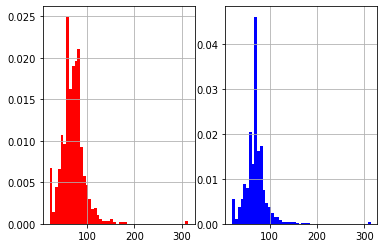

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
X_train['LotFrontage'].hist(bins=50,ax=ax1,density=True,color='red')

X_na['LotFrontage'].hist(bins=50,ax=ax2,color='blue',density=True)

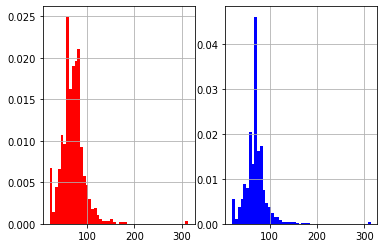

In [ ]:
fig=plt.figure()
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
X_train['LotFrontage'].hist(bins=50,ax=ax1,density=True,color='red')

X_na1['LotFrontage'].hist(bins=50,ax=ax2,color='blue',density=True)

**下面来整体看一下分布的变化**

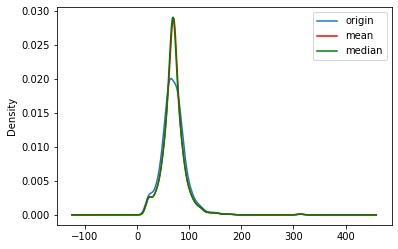

In [ ]:
#放在一起看的更加清晰
fig=plt.figure()
ax=fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde',ax=ax)
X_na['LotFrontage'].plot(kind='kde',ax=ax,color='red')
X_na1['LotFrontage'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,['origin','mean','median'],loc='best')

**然后我们说过这种处理方法会导致离群值的增加**

由下图可以明显看出范围缩窄了，极有可能导致离群值的增加

      origin        mean  median
193     24.0   24.000000    24.0
590     64.0   64.000000    64.0
917      NaN   70.049958    69.0
1431     NaN   70.049958    69.0
586     55.0   55.000000    55.0
...      ...         ...     ...
1147    75.0   75.000000    75.0
1422    37.0   37.000000    37.0
933     63.0   63.000000    63.0
577     96.0   96.000000    96.0
1273   124.0  124.000000   124.0

[1168 rows x 3 columns]


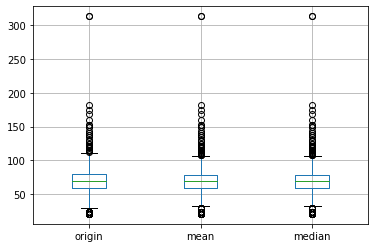

In [ ]:
test=pd.concat(
    [
     X_train['LotFrontage'],
     X_na['LotFrontage'],
     X_na1['LotFrontage'],
    ],
    axis=1
)
test.columns=['origin','mean','median']
print(test)
test.boxplot()

### <font color=red>**任意值补充法(重要）**</font>




任意值补充法不是说每一个缺失值都用任意一个值补充，而是我们对于每个变量，选择该变量对应的一个任意值，然后改变量的全部缺失值就用该任意值去填充


**通常来说我们会选择变量正常范围之外的值**

比如某个数值变量的范围是0-99，我们可以使用-1或者120之类的，虽然是要在变量范围之外，但是值的差异不要太大。

再比如类别变量，有0，1，2三个类别，那么我们可以用4去填充缺失值，相当于多了一个叫做缺失的类别


**好处**

1.易于实现

2.快速获取完整数据集

3.可以集成到生产中

4.如果缺失值非常重要，那么这个方法能够让模型补抓到重要性（因为相当于另起了一个类别）

5.缺失率即使很大，这方法也很有效

**坏处**：

1.会导致原始变量分布和方差的变化

2.导致变量之间相关性的变化

3.如果任意值位于分布末尾，可能会掩盖或者创建异常值


**说明一下坏处的第三点：**

如果你设定的任意值离数据大部队很远，那么该任意值可能会在离群值设别的步骤中被识别成异常值进行处理，有可能会被去掉

如果设定的任意值虽然不是离大部队远，但是由于设定在分布末尾，可能会加大分数的范围，导致部分异常值最终被纳入正常范围中


**什么时候使用任意值填充**

当缺失值的机制不是随机缺失，而是非随机缺失，那么我们就用任意值填充


####**数值变量的任意值填充法**

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


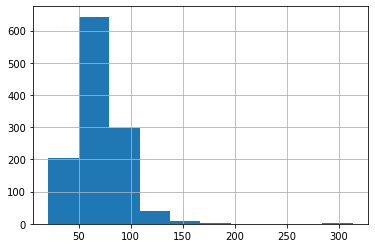

In [ ]:
##首先我们得清清楚变量的数值分布情况
print(df['LotFrontage'].describe())
df['LotFrontage'].hist()

由上可知最小值为21，最大值为313，大部分集中在70，也就是均值和中位数的地方，而且该分布比较偏左边，所以可能**右边异常值较多**，所以为了防止异常值的掩盖，我们最好选择小于最小值的任意值，我们这里就用-1来表示

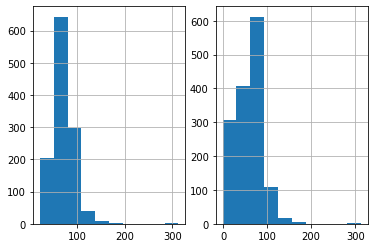

In [ ]:
df_na=df['LotFrontage'].fillna(-1)
fig=plt.figure()
ax=fig.add_subplot(121)
ax1=fig.add_subplot(122)

df['LotFrontage'].hist(ax=ax)
df_na.hist(ax=ax1)



**我们来对比下如果选择用分布的末尾来作为任意值，效果很怎么样**

假设我们使用350来表示任意值

In [ ]:
df_na=df['LotFrontage'].fillna(-1)
df_na1=df['LotFrontage'].fillna(350)

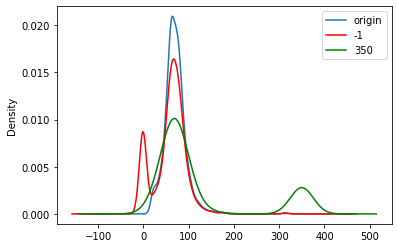

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['LotFrontage'].plot(kind='kde',ax=ax)
df_na.plot(kind='kde',ax=ax,color='red')
df_na1.plot(kind='kde',ax=ax,color='green')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,['origin','-1','350'])

**由下面箱线图可以看出，选择-1和选择350为任意值都会隐藏一些离群值，但350自身也作为离群值，且350会隐藏的更多，**

**当然若离群值是要舍去的离群值，那么只要保证自身不为离群值就可以**

<font color=red>**所以选择任意值要经过多次探索**</font>

      origin    -1   350
0       65.0  65.0  65.0
1       80.0  80.0  80.0
2       68.0  68.0  68.0
3       60.0  60.0  60.0
4       84.0  84.0  84.0
...      ...   ...   ...
1455    62.0  62.0  62.0
1456    85.0  85.0  85.0
1457    66.0  66.0  66.0
1458    68.0  68.0  68.0
1459    75.0  75.0  75.0

[1460 rows x 3 columns]


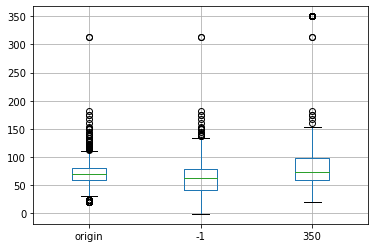

In [ ]:
test=pd.concat(
    [
     df['LotFrontage'],
     df_na,
     df_na1wi
    ],
    axis=1

)
test.columns=['origin','-1','350']
print(test)
test.boxplot()

####**类别变量的任意值补充法**

正如上面所说，对于类别变量的缺失值，我们可以用一个全新的类别代表缺失这个类别

***即使丢失数量很多也很有用***

<font color=red>**需要唯一注意一点的就是，如果丢失率很小，用这个方法会导致树类型的机器学习算法过拟合，但是对其他算法没有影响**</font>



In [ ]:
df['FireplaceQu'].isnull().sum()/len(df)

0.4726027397260274

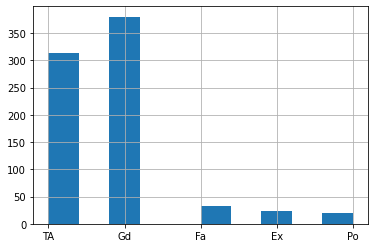

In [ ]:
#检查该变量有啥类别
df['FireplaceQu'].hist()

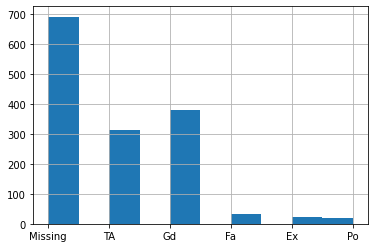

In [ ]:
##填充
a=df['FireplaceQu'].fillna('Missing')
a.hist()

###**根据分布填充缺失值**

其本质是跟任意值一样的，都是根据当前变量的值来选定一个值，然后该变量的所有缺失值都用这个值来替代

**而这个办法与任意值的不同之处就是在于，任意值方法是自己定任意值，而这个方法是根据变量的分布算出来的**

**若变量服从正态分布**：

则我们使用平均值$\pm$3*std来作为任意值

**若变量服从偏移分布**

则我们使用判断离群值上下边界来作为任意值


**其余如优点缺点适用范围都是跟上面的任意值一样的**

<font color=red>**由于可视化和上面基本一样，所以这里只写一下填充的代码**</font>

In [ ]:
def impute_na(df,index,type):
  if type=='norml':
    df_na=df[index].fillna(df[index].mean()+3*df[index].std())
  else:
    IQR=df[index].quantile(0.75)-df[index].quantile(0.25)
    df_na=df[index].fillna(df[index].quantile(0.75)+3*IQR)
  return df_na

###**用最常见的类别来填充缺失值**


这个方法是专门针对类别变量类型的，其内容就是找到出现次数最多的类别，然后用该类别填充该变量的所有缺失值

**优点**：

1.易于实施

2.快速获取完整数据集的方法

3.可以集成到生产中

**缺点**：

1.扭曲最频繁标签与其他变量的关系

2.如果缺失率过大，会导致最频繁标签出现过多

**适用情况**：

1.当该类别变量的丢失机制是数据完全随机丢失

2.缺失率不超过5%


In [ ]:
a=df.isnull().sum()/len(df)
a[a>0]

##我们选择BsmtQual作为正例以及FireplaceQU作为反例来看

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [ ]:
print(df['BsmtQual'].head(5))
print(df['FireplaceQu'].head(5))

0    Gd
1    Gd
2    Gd
3    TA
4    Gd
Name: BsmtQual, dtype: object
0    NaN
1     TA
2     TA
3     Gd
4     TA
Name: FireplaceQu, dtype: object


**然后我们要找到频率最高的变量**

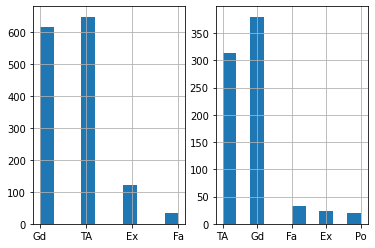

In [ ]:
fig=plt.figure(1)
ax=fig.add_subplot(121)
ax1=fig.add_subplot(122)
df['BsmtQual'].hist(ax=ax)
df['FireplaceQu'].hist(ax=ax1)

In [ ]:
Bsmt_na=df['BsmtQual'].fillna('TA')
Fire_na=df['FireplaceQu'].fillna('Gd')

**我们看一下填充前后的分布情况**

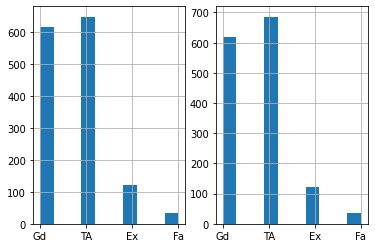

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(121)
ax1=fig.add_subplot(122)

df['BsmtQual'].hist(ax=ax)
Bsmt_na.hist(ax=ax1)

##可以看到效果还是很不错，因为缺失率不是很高

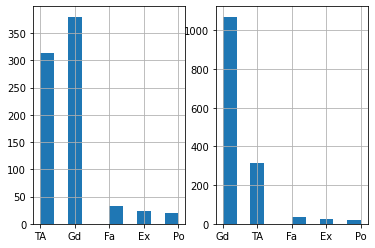

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(121)
ax1=fig.add_subplot(122)

df['FireplaceQu'].hist(ax=ax)
Fire_na.hist(ax=ax1)

##会发现整体效果变化很大

###**随机样本插补**

随机样本插补就是对于每一个缺失值，从该变量其他完整值中随机选取一个值填入。**所以该方法会使变量的分布和方差变化不大，因为抽取的数据本来就是服从变量本身的分布**

**所以如果我们希望保留变量本身的分布和方差，就用这个方法**

**优点**：

- 易于实施
- 快速建立完整数据集
- 保留变量原本的分布和方差

**缺点**：

- 随机性很大
- 如果丢失率很大，变量之间的关系可能受到影响
- 不利于部署


**适用情况**：

- 数据完全随机丢失
- 变量中包含不超过5%的数据
- 非常适合线性模型

<font color=red>**看起来跟中值均值很像，的确，在一般情况下我们都选用中值均值的方法而不是这个，但是如果我们知道变量和目标之间是呈线性的关系（只能提前知道，因为有缺失值无法直接判断），就可以用这个方法**



**同时需要额外注意的是，因为我们需要随机抽样，所以我们得储存数据的分布，在这个方法中，我们通常选取训练集的数据分布，然后在该分布中随机抽样进行训练集和测试集的缺失值填充**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(df)
X_train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
872,873,20,RL,74.0,8892,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,1996,Gable,CompShg,WdShing,Wd Shng,None,0.0,Gd,TA,Stone,TA,TA,Av,Unf,0,Unf,0,105,105,GasA,...,Y,SBrkr,910,0,0,910,0,0,1,0,3,1,Gd,5,Typ,0,NaN,Attchd,1953.0,Unf,2,414,TA,TA,Y,196,0,150,0,0,0,NaN,GdWo,NaN,0,10,2008,WD,Normal,116000
374,375,60,RL,65.0,8200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,847,847,GasA,...,Y,SBrkr,847,1081,0,1928,0,0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2003.0,Fin,2,434,TA,TA,Y,100,48,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,219500
737,738,60,RL,72.0,10463,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,893,893,GasA,...,Y,SBrkr,901,900,0,1801,0,0,2,1,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,800,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,239900
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,RRAn,Norm,1Fam,2Story,7,5,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,184.0,TA,TA,CBlock,Gd,TA,No,BLQ,790,LwQ,469,133,1392,GasA,...,Y,SBrkr,1392,1392,0,2784,1,0,3,1,5,1,Gd,12,Typ,2,TA,Attchd,1978.0,RFn,2,564,TA,TA,Y,0,112,0,0,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,2Story,8,4,1918,1990,Gable,CompShg,Stucco,Stucco,None,0.0,Gd,Gd,PConc,TA,TA,No,GLQ,1036,LwQ,184,140,1360,GasA,...,Y,SBrkr,1360,1360,392,3112,1,1,2,0,4,1,Gd,8,Typ,1,Ex,Detchd,1918.0,Unf,2,795,TA,TA,Y,0,16,552,0,0,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
1344,1345,60,RL,85.0,11103,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,728,728,GasA,...,Y,SBrkr,728,728,0,1456,0,0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,2006.0,Fin,2,440,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,Partial,155835
329,330,70,RM,60.0,6402,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,PConc,TA,TA,Mn,Unf,0,Unf,0,596,596,GasA,...,N,SBrkr,596,596,0,1192,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,189,Fa,Fa,N,0,0,137,0,0,0,NaN,GdWo,NaN,0,7,2009,WD,Normal,78000
1410,1411,60,RL,79.0,12420,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,666,Unf,0,278,944,GasA,...,Y,SBrkr,944,896,0,1840,1,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,RFn,2,622,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,230000
579,580,50,RM,81.0,12150,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,5,1954,1954,Gable,CompShg,MetalSd,MetalSd,BrkFace,335.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,1050,1050,GasA,...,N,FuseF,1050,745,0,1795,0,0,2,0,4,1,TA,7,Typ,0,NaN,Attchd,1954.0,Unf,1,352,Fa,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,131500
655,656,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1971,1971,Gable,CompShg,HdBoard,ImStucc,BrkFace,381.0,TA,TA,CBlock,

In [ ]:
#先进行dropna后对完整数据的样本进行随机抽样，然后抽样数量就是缺失值数量
random_sample_train=X_train['LotFrontage'].dropna().sample(X_train['LotFrontage'].isnull().sum())

X_na=X_train['LotFrontage'].fillna(random_sample_train)



**可以看到分布基本没有发生变化**

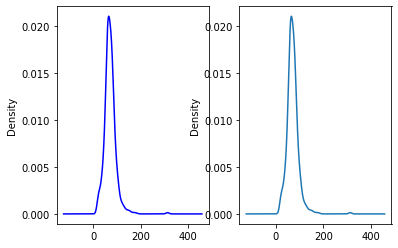

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(121)
ax1=fig.add_subplot(122)
X_train['LotFrontage'].plot(kind='kde',ax=ax,color='blue')
X_na.plot(kind='kde',ax=ax1)

**离群值也很少受到影响**

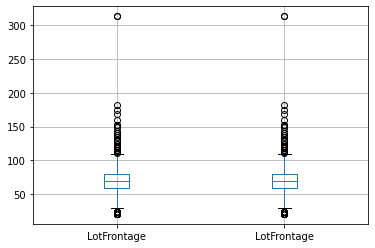

In [ ]:
test=pd.concat([
    X_train['LotFrontage'],
    X_na
],axis=1)

test.boxplot()

### <font color=red>**缺失指示符（重要）**</font>

缺失指示符也是非常常用且有效的方法，上面我们谈到了任意值缺失值补充法，针对于非随机缺失机制的缺失值。

但是那个方法会影响变量的分布，对于非线性模型，树模型等影响不大，但是如果想用线性模型，就无法用那个方法

**而这个方法就是针对非随机缺失机制，但是又想使用线性模型的时候**

##### **方法内容**

首先对于缺失值我们仍然使用处理完全随机缺失的方法，比如中值均值方法，最常见类别填补的方法。但是我们需要另起一列，是针对该变量的标记变量，如果原本为缺失值，则为1，如果不是，则为0

所以整体的方法应该是这样的：

- 均值中位插补+缺失指标（针对数值变量）
- 最常见类别插补+缺失指标（针对类别变量）
- 随机样本插补+缺失指标（类别和数值）


**优点**：

1.易于实施

2.可以补抓丢失数据的重要性

3.可以保持变量的分布，对线性模型很好



**缺点**：

1.特征维度提高很多，最多扩展为原来的二倍


###**适用场景**

数据为非随机丢失，且我们想要用线性模型的时候




In [ ]:
print(df['LotFrontage'].head(5))

print(df['FireplaceQu'].head(5))

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64
0    NaN
1     TA
2     TA
3     Gd
4     TA
Name: FireplaceQu, dtype: object


In [ ]:
print(df['LotFrontage'].isnull().sum()/len(df))
print(df['FireplaceQu'].isnull().sum()/len(df))

0.1773972602739726
0.4726027397260274


**用缺失值指示**

In [ ]:
df['LotFrontage_NA']=np.where(df['LotFrontage'].isnull(),1,0)
df['FireplaceQu_NA']=np.where(df['FireplaceQu'].isnull(),1,0)

**然后填补缺失值，我们根据数据的分布来确定用什么方法**

<font color=red>**建议用随机样本插值，因为用这个方法本来就是为了线性模型而使用**</font>

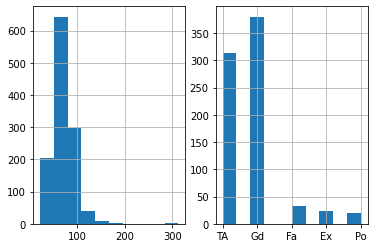

In [ ]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(121)
ax1=fig.add_subplot(122)
df['LotFrontage'].dropna().hist(ax=ax)
df['FireplaceQu'].dropna().hist(ax=ax1)

In [ ]:
def fill_na(df,index,type):
  if type=='median':
    df[index].fillna(df[index].median())
  elif type=='mean':
    df[index].fillna(df[index].mean())
  elif type=='frequent':
    df[index].fillna(df[index].mode()[0])
  elif type=='random':
    random=df[index].dropna().sample(df[index].isnull().sum())
    df[index].fillna(random)
  return df


### **<font color=red>sklearn实现上面算法</font>**

**注意simpleImputer和ColumnTransformer**

前者是对所有列用同一种插补技术，但是这个灵活性不高

后者是与前者结合在一起，对不同列用不同的插补技术

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


df=pd.read_csv('/content/drive/My Drive/dataset/机器学习/train_house.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
a=df.isnull().sum()/len(df)
a[a>0]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

**实现中值均值插补**

In [5]:
from sklearn.model_selection import train_test_split
##首先前面说过中值均值插补要在训练集上计算完中值均值
X_train,X_test=train_test_split(df)

##然后选择用中值填充的列，用均值填充的列
mean_fill_na=['LotFrontage']
median_fill_na=['MasVnrArea']

##然后建立不同列对应的插补技术
mean_imputer=Pipeline([('imputer',SimpleImputer(strategy='mean'))])
median_imputer=Pipeline([('imputer',SimpleImputer(strategy='median'))])

#名字，插补技术，插补的列
nan_preprocessor=ColumnTransformer(transformers=[
      ('mean_imputer',mean_imputer,mean_fill_na),
      ('median_imputer',median_imputer,median_fill_na)                                           
],remainder='passthrough')

nan_preprocessor.fit(X_train)

X_train=nan_preprocessor.transform(X_train)
X_test=nan_preprocessor.transform(X_test)

**任意值插补**

由于进行插补每一列的任意值都不同，所以任意值插补要建立多个管道.

而由于任意值是自己设置的，所以进行插补前要进行数据探索确定插补的任意值

In [7]:
X_train,X_test=train_test_split(df)
##选择要进行任意值插补的列
feature_LotFrontAge=['LotFrontage']
feature_MasVnrArea=['MasVnrArea']
feautre_GarageYrblt=['GarageYrBlt']

feature_BsmtQual=['BsmtQual']

###对每列都建立一个任意值插补管道

####数值变量
imputer_LotFrontAge=Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value=999))])
imputer_MasVnrArea=Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value=-10))])
imputer_GarageYrblt=Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value=1700))])

####类别变量
imputer_BsmtQual=Pipeline([('imputer',SimpleImputer(strategy='constant',fill_value='Missing'))])


nan_preprocessor=ColumnTransformer(transformers=[
       ('LotFrontage',imputer_LotFrontAge,feature_LotFrontAge),
       ('MasVnrArea',imputer_MasVnrArea,feature_MasVnrArea),
       ('GarageYrBlt',imputer_GarageYrblt,feautre_GarageYrblt),
       ('BsmtQual',imputer_BsmtQual,feature_BsmtQual)                                          
],remainder='passthrough')

nan_preprocessor.fit(X_train)

X_train=nan_preprocessor.transform(X_train)
X_test=nan_preprocessor.transform(X_test)



X_train.shape


(1095, 81)

**用最常见类别插补**

In [ ]:
X_train,X_test=train_test_split(df)

##进行最常见类别插补的列
frequent_columns=['BsmtQual','FireplaceQu','MSZoning']

frequent_imputer=Pipeline([('imputer',SimpleImputer(strategy='most_frequent'))])

nan_preprocessor=ColumnTransformer(transformers=[
    ('frequent_imputer',frequent_imputer,frequent_columns)
],remainder='passthrough')

nan_preprocessor.fit(X_train)
X_train=nan_preprocessor.transform(X_train)
X_test=nan_preprocessor.transform(X_test)

**缺失值指示**

我们说过，如果想用线性模型，那么我们就用缺失值指示，所以一般来说，如果使用缺失值指示，那么我们就全部缺失值填补都用缺失值指示，然后填补的值我们可以都用一种方法去填充，比如都用中值均值，或者都用最常见的值

In [10]:
from sklearn.pipeline import FeatureUnion
from sklearn.impute import MissingIndicator
X_train,X_test=train_test_split(df)
transformer=FeatureUnion(
    transformer_list=[
        ('features',SimpleImputer(strategy='most_frequent')),
        ('indicators',MissingIndicator(features='missing-only'))
    ]
)

transformer.fit(X_train)
X_train=transformer.transform(X_train)
X_test=transformer.transform(X_test)
X_train.shape

(1095, 100)

### **sklearn额外填充方法**

sklearn除了常用的缺失值填补方法之外，还提供了其他方法

**KNN插补**

sklearn还提供了使用knn进行缺失值填补的方法，根据邻居的值来进行缺失值的填补

In [12]:

from sklearn.impute import KNNImputer

X_train,X_test=train_test_split(df)

###要进行knn填补的列
knn_columns=['LotFrontage']

##进行knn填补
knn_imputer=KNNImputer(n_neighbors=3,weights='distance')

transformer=ColumnTransformer(transformers=[
    ('imputer',knn_imputer,knn_columns)
])
transformer.fit(X_train)

X_train=transformer.transform(X_train)
X_test=transformer.transform(X_test)

<font color=red>**多元特征插补**</font>

这是个新的方法，还在实验阶段，其内容就是对于每一个有缺失值的列，我们将其他完整数据的列视为输入x，而该列的完整值会是y，然后训练一个回归模型，根据x输出y，然后缺失值的部分就可以根据其他列的数值来填充

In [ ]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# imputer=IterativeImputer(max_iter=20,random_state=0)

##先将所有类别变量转化成数值变量

# imputer.fit(X_train)
# X_train=imputer.transform(X_train)


# **分类编码（类别处理）**



在进行如何分类编码，我们先讨论类别本身的影响，首先我们称数据集中类别的数量为基数。

然后高基数的数据集会造成很多影响

1.高基数的数据集极有可能有部分标签在训练集上，而有部分在测试集上，意味着在测试集的某些标签不存在训练集中，也意味着训练集的某些标签也不存在训练集中

2.训练集标签过多，会造成过拟合的情况，而测试集某些标签没出现在训练集，可能会造成模型无法识别该标签的情况

3.高基数的数据可能会带来某几种标签信息过小的数据，这相当于引入噪声，会让大部分机器学习模型易于过拟合，所以对于大部分机器学习模型，我们最好减少基数


4.但是高基数的数据集对于树而言效果又很好，树能够较好的处理高基数的数据集

### **分类编码方法**

#### **one-hot编码方法**





对于一个类别变量，假设其有k个类别，那么one-hot会将其变为k-1列，1代表类别为当前列，这时可以表示k-1个类别，然后最后第k个类别是当k-1列全部为0时，其类别为第k个。

**对于k个变量，我们用k-1个二进制变量来表示，可以避免引入冗余信息，减少内存**

**但是对于某些特殊情况，我们就要用k个二进制变量来表示k个变量**:
- 当我们用树方法的时候
- 当我们使用递归算法进行特殊选择
- 如果我们需要确定每个类别的重要性时


**该方法的优点**：
- 简单
- 不需要去观察类别变量的分布
- 能够保留分类变量的所有信息
- 适用于线性模型

**缺点：**
- 会极大扩展特征空间



#**稀少数据**




稀少数据指的是某些标签其数据很少

稀少数据的问题会有以下几个问题：

1.划分数据集的话，如果为稀少数据，极有可能造成训练集没有或者测试集没有数据，就会造成模型不会判断的问题

2.稀少数据会造成过拟合，是因为稀少数据代表性不够，通常只有大量数据才能代表某个标签的特性


**一个很简单解决稀少数据的想法就是把所有的稀有数据先归为一类，这类代表所有的稀少数据，然后先对整体进行处理，而对于稀少部分，再进行额外的处理**

# ***检查线性关系，提高线性模型性能***





如何检查修正特征与标签或者特征与特征之间地线性关系呢？

这里提供了多种方法

1.画散点图，直接根据散点图来判断是否呈线性，但问题在于有时候不能直接判断出是否线性，同时多维变量无法通过图画出


2.通过检查误差来评估线性关系：
方法就是先建立一个线性模型，然后训练线性模型得到预测值后计算错误，然后观察误差的分布。
如果变量和目标之间存在线性关系，那么误差应该是遵循以0为中心的正态分布，越接近正态分布则越为线性

**这个方法对于回归问题很好用，也不用担心多维变量**



但是我们如何合理的去判断为正态分布呢？
我们通常会画一个qq图，如果图像上的所有点基本都在45度线上，那么就为正态分布

In [ ]:
import pylab
import scipy.stats as stats
import matplotlib.pyplot as plt
def get_gaussian(error):
  plt.hist(error)
  plt.xlabel('错误')
  plt.ylabel('频率')
  plt.show()

def get_qq(error):
  stats.probplot(error,dist='norm',plot=pylab)
  pylab.show()


**提高线性模型性能**

1.如果用上面的方法得到的误差很接近正态分布，但仍有区别，我们可以想办法删掉一些影响线性因素的特征，来修正线性关系

那如何修正呢？由于变量和目标是线性关系，那么变量里面的多维变量应该不要有多重共线性，否则会影响线性模型的性能

那么如何检查呢，就是通过检查自变量之间地自相关性，相关性高的变量不一定说他们是共线性的，因为相关性是相对的，**我们找到相关性高的变量，然后画出散点图，通过散点图我们能看出是否共线性**（也就是两变量线性关系很大）

如果共线性大，那么我们就删掉其中一个即可

# **离群值**






所谓离群值是指与大部分数据明显不同的点。

离群值对于机器学习模型的影响很大很大！

离群值的处理要分为两种，一是特别注意，二是直接忽略，那么我们应该选择哪一种呢？

我们要根据实际问题来确定如何处理离群值：

比如信用卡突然出现一笔巨款，这必然这是一个离群值，但这个离群值我们需要特别注意，因为有可能有犯罪。

再比如像机器测量的误差导致的离群值，录入数据失误的离群值，这些离群值就应该删除


##如何判断离群值呢？

对于每个变量，我们通常适用极值分析来确定离群值

***如果变量是正态分布（左右对称）***：

至于如何判断正态分布，可结合该变量的直方图以及qq图来观察

那么我们就计算变量的平均值及其标准差，然后如果一个值与平均值的差大于三倍的标准差，那么称该值为离群值

***如果变量不是正态分布，左右不对称，是偏斜的***：

同理判断为偏斜分布也可以结合直方图以及qq图

首先我们先找到偏斜分布的第25分位数和第75位数，计算其差，则差就为分数范围，那么我们可以设定一个边界，

上边界=第75位+1.5*分数范围 

下边界=第25位-1.5*分数范围

超过边界的我们就视为离群值


<font color=red>**我们可以通过箱线图先大概看一下，因为箱线图自动会把上面所说的边界，分位数都标出来**</font>


In [ ]:
def found_normal_outliers(df,index):
   upper_boundary=df[index].mean()+3*df[index].std()
   lower_boundary=df[index].mean()-3*df[index].std()

   print('upper_boundary:{}'.format(upper_boundary))
   print('lower_boundary:{}'.format(upper_boundary))

   outliers=df[index][df[index]<lower_boundary or df[index]>upper_boundary]
   print(outliers)
   return outliers


def found_skewed_outliers(df,index):
  IQR=df[index].quantile(0.75)-df[index].quantile(0.25)
  lower_boundary=df[index].quantile(0.25)-1.5*IQR
  upper_boundary=df[index].quantile(0.75)+1.5*IQR

  
  print('upper_boundary:{}'.format(upper_boundary))
  print('lower_boundary:{}'.format(upper_boundary))

  outliers=df[index][df[index]<lower_boundary or df[index]>upper_boundary]
  print(outliers)
  return outliers


# **变量scale**



变量的规模对于机器学习模型的影响还是蛮大的

1. 如果是回归模型，那么回归系数直接受变量规模影响

2.范围较大的变量在训练中会比范围小的变量更占主导地位

3.如果变量范围都基本相似，则训练的时候速度会加快

4.通常来说，除了树模型，变量范围相似的话可以提高机器学习模型性能